In [1]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
import matplotlib.pyplot as plt
from random import *
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data_train =pd.read_csv('./data/fashion-mnist_train.csv',header=0)
data_train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# thay đổi shape của labels bằng reshape
# 60000 giá trị từ 0-9
#  (vì bước sau nhân ma trận 2 chiều nên phải là 2 chiều trong khi ban đầu là 1 chiều)
labels = data_train['label'].values.reshape(1,60000)
# transpose để hoán vị hàng cột, (60000,784) -> (784,60000)
train = data_train.drop('label',axis=1).values.transpose()

print(labels.shape)
# đưa giá trị pixels về 0-1 bằng cách chia cho 255 để giảm độ lớn của giá trị
train = np.array(train/255.0)
print(train.shape)

(1, 60000)
(784, 60000)


In [4]:
labels_ = np.zeros((60000,10))
labels_[np.arange(60000),labels] = 1
# print(labels_)

# 60000,10 -> 10,60000
labels_ = labels_.transpose()
labels_ = np.array(labels_)
print(labels_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [5]:
n_dim = 784

tf.reset_default_graph()
n1 = 5 # số lượng neural ở layer 1
n2 = 10 # số lượng neural ở layer output
# y = f(x) = Wx + b
cost_history = np.empty(shape=[1],dtype=float)
# print(cost_history)
learning_rate = tf.placeholder(tf.float32,shape=())
X = tf.placeholder(tf.float32,[n_dim,None]) # 784,
Y = tf.placeholder(tf.float32,[n2,None]) # 10,

W1 = tf.Variable(tf.truncated_normal([n1,n_dim],stddev=0.1)) # 5,784
b1 = tf.Variable(tf.zeros([n1,1])) # 5,1  bias
W2 = tf.Variable(tf.truncated_normal([n2,n1],stddev=0.1)) # 10,5
b2 = tf.Variable(tf.zeros([n2,1])) # 10,1  bias
Z1 = tf.nn.sigmoid(tf.matmul(W1,X)+b1) # 5,784 * 784,1 + 5,1 = 5,1
Z2 = tf.nn.sigmoid(tf.matmul(W2,Z1) + b2) # 10,5 * 5,1 + 10,1 = 10,1
y_ = tf.nn.softmax(Z2,0) # 10,1
cost = - tf.reduce_mean(Y* tf.log(y_) + (1-Y)*tf.log(1-y_)) # as the loss function
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [6]:
sess = tf.Session()
sess.run(init)

training_epochs = 100

for epoch in range(training_epochs+1):
    sess.run(optimizer,feed_dict={X:train,Y:labels_,learning_rate:0.001})
    cost_ = sess.run(cost,feed_dict={X:train,Y:labels_})
    cost_history = np.append(cost_history,cost_)
    if epoch % 20 == 0:
        print('Epoch: ',epoch,' cost: ',cost_)

correct_predictions = tf.equal(tf.argmax(y_,0),tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
print('Accuracy: ',accuracy.eval({X:train,Y:labels_,learning_rate:0.001},session=sess))

Epoch:  0  cost:  0.32350537
Epoch:  20  cost:  0.30791783
Epoch:  40  cost:  0.29106176
Epoch:  60  cost:  0.27452958
Epoch:  80  cost:  0.25207046
Epoch:  100  cost:  0.2338294
Accuracy:  0.47891667


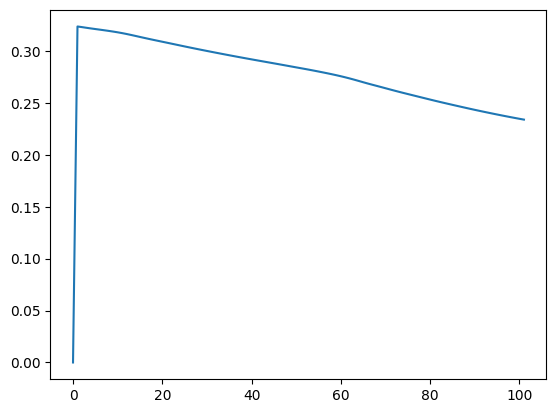

In [7]:
plt.plot(cost_history)
plt.show()